## 지도학습_분류분석_컬럼선택법_클래스불균형_모델성능향상

# 중요 컬럼 선택하기
1) EDA를 통해서 종속변수(target)과 중요한 관계가 있는 변수들만 선택
2) 수치형 변수는 상관분석 결과를 통해, 범주형 변수는 카이제곱 통계량(통계학적 방법)
3) 머신러닝 알고리즘을 통한 1차 분석 후 중요하게 사용된 변수만 선택

# tree 계열 모델의 feature_importance로 선택하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
data= pd.read_csv('./data/salary2.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data2 = data.copy()

In [6]:
data = data.drop_duplicates()

In [8]:
data = data.dropna()

In [12]:
data = data.reset_index(drop=True)

In [14]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
data['class'] = data['class'].apply(lambda x : 1 if x==' >50K' else 0)

In [19]:
data = pd.get_dummies(data, drop_first=True)

In [20]:
X = data.drop('class', axis=1)
y = data['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,random_state=10)

In [26]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11706
           1       0.77      0.58      0.66      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



# feature_imortance 출력하기

In [30]:
importance = pd.DataFrame(dtc.feature_importances_)

In [31]:
cols = pd.DataFrame(dtc.feature_names_in_)

In [39]:
cols_importance = pd.concat([cols, importance], axis=1)
cols_importance

,0,0
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [40]:
cols_importance.columns = ['column','importance']

In [41]:
cols_importance

,column,importance
0,age,0.038730
1,education-num,0.194695
2,capital-gain,0.216183
3,capital-loss,0.078845
4,hours-per-week,0.031110
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.000000
93,native-country_ Vietnam,0.000000


In [45]:
cols_importance = cols_importance.sort_values('importance', ascending=False)

In [46]:
cols_importance[
    cols_importance['importance'] > 0
]

,column,importance
27,marital-status_ Married-civ-spouse,0.400573
2,capital-gain,0.216183
1,education-num,0.194695
3,capital-loss,0.078845
0,age,0.038730
4,hours-per-week,0.031110
34,occupation_ Exec-managerial,0.011520
8,workclass_ Self-emp-not-inc,0.006948
35,occupation_ Farming-fishing,0.004866
54,sex_ Male,0.003542


# random_forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11706
           1       0.68      0.60      0.64      3990

    accuracy                           0.83     15696
   macro avg       0.77      0.75      0.76     15696
weighted avg       0.82      0.83      0.82     15696



In [52]:
importance2 = pd.DataFrame(rfc.feature_importances_, columns=['importance'])

In [54]:
column2 = pd.DataFrame(rfc.feature_names_in_, columns=['column'])

In [56]:
rfc_importance = pd.concat([column2, importance2], axis=1)
rfc_importance

,column,importance
0,age,0.229726
1,education-num,0.060181
2,capital-gain,0.122142
3,capital-loss,0.041190
4,hours-per-week,0.117826
...,...,...
90,native-country_ Thailand,0.000140
91,native-country_ Trinadad&Tobago,0.000107
92,native-country_ United-States,0.006653
93,native-country_ Vietnam,0.000283


In [57]:
rfc_importance[
    rfc_importance['importance'] > 0
].sort_values('importance', ascending=False)

,column,importance
0,age,0.229726
2,capital-gain,0.122142
4,hours-per-week,0.117826
27,marital-status_ Married-civ-spouse,0.083482
1,education-num,0.060181
...,...,...
23,education_ Preschool,0.000061
81,native-country_ Outlying-US(Guam-USVI-etc),0.000054
69,native-country_ Honduras,0.000049
32,occupation_ Armed-Forces,0.000041


# xgboost

In [166]:
from xgboost import XGBRFClassifier

In [60]:
xgb = XGBRFClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11706
           1       0.78      0.55      0.65      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.75      0.77     15696
weighted avg       0.84      0.85      0.84     15696



In [64]:
importance3 = pd.DataFrame(xgb.feature_importances_, columns=['importance'])
column3 = pd.DataFrame(xgb.feature_names_in_, columns=['column'])
xgb_importance = pd.concat([column3, importance3], axis=1)
xgb_importance

,column,importance
0,age,0.006221
1,education-num,0.071757
2,capital-gain,0.085027
3,capital-loss,0.015830
4,hours-per-week,0.007952
...,...,...
90,native-country_ Thailand,0.000000
91,native-country_ Trinadad&Tobago,0.000000
92,native-country_ United-States,0.001412
93,native-country_ Vietnam,0.000000


In [69]:
xgb_importance[
    xgb_importance['importance'] > 0.01
].sort_values('importance', ascending=False)

,column,importance
27,marital-status_ Married-civ-spouse,0.675406
2,capital-gain,0.085027
29,marital-status_ Never-married,0.075835
1,education-num,0.071757
3,capital-loss,0.015830
40,occupation_ Prof-specialty,0.015828


In [70]:
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [82]:
data2 = data2.drop_duplicates()
data2 = data2.dropna().reset_index(drop=True)

In [96]:
data3 = data2.loc[:,['age','education-num', 'marital-status', 'capital-gain', 'sex', 'occupation', 'capital-loss', 'class']]

In [97]:
data3

,age,education-num,marital-status,capital-gain,sex,occupation,capital-loss,class
0,25,7,Never-married,0,Male,Machine-op-inspct,0,<=50K
1,38,9,Married-civ-spouse,0,Male,Farming-fishing,0,<=50K
2,28,12,Married-civ-spouse,0,Male,Protective-serv,0,>50K
3,44,10,Married-civ-spouse,7688,Male,Machine-op-inspct,0,>50K
4,34,6,Never-married,0,Male,Other-service,0,<=50K
...,...,...,...,...,...,...,...,...
39235,53,14,Married-civ-spouse,0,Male,Exec-managerial,0,>50K
39236,22,10,Never-married,0,Male,Protective-serv,0,<=50K
39237,27,12,Married-civ-spouse,0,Female,Tech-support,0,<=50K
39238,58,9,Widowed,0,Female,Adm-clerical,0,<=50K


In [98]:
data3 = pd.get_dummies(data3, drop_first=True)

In [99]:
data3.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'sex_ Male', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'class_ >50K'],
      dtype='object')

In [100]:
X = data3.drop('class_ >50K', axis=1)
y = data3['class_ >50K']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y,random_state=10)

In [102]:
xgb = XGBRFClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.86      0.95      0.90     11706
        True       0.77      0.55      0.64      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.75      0.77     15696
weighted avg       0.84      0.85      0.84     15696



In [103]:
importance3 = pd.DataFrame(xgb.feature_importances_, columns=['importance'])
column3 = pd.DataFrame(xgb.feature_names_in_, columns=['column'])
xgb_importance = pd.concat([column3, importance3], axis=1)
xgb_importance[
    xgb_importance['importance'] > 0.01
].sort_values('importance', ascending=False)

,column,importance
5,marital-status_ Married-civ-spouse,0.756315
2,capital-gain,0.080523
1,education-num,0.065413
7,marital-status_ Never-married,0.034950
19,occupation_ Prof-specialty,0.016885
3,capital-loss,0.016231


In [104]:
y.value_counts()

class_ >50K
False    29265
True      9975
Name: count, dtype: int64

# 클래스 불균형을 처리하는 방법
* 클래스 불균형 : 종속변수(target)의 클래스(값, 요소)의 비율이 일치하지 않는 경우
* 연봉 데이터의 경우 >50k가 1, <=50k가 3의 비율을 가지고 있음
1) train_test_split 할  때 stratify= 옵션을 반드시 포함
2) 머신러닝 알고리즘에 있는 소수 클래스에 가중치를 주는 옵션 on
    * ex) class_weight

#### decisionTree 모델의 경우 class_weight='balanced'

In [111]:
dtc = DecisionTreeClassifier(class_weight='balanced',max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.89      0.85      0.87     11706
        True       0.62      0.70      0.66      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.78      0.76     15696
weighted avg       0.82      0.81      0.82     15696



#### random_forest 모델의 경우 class_weight='balanced'

In [114]:
for i in range(1,21):
    rfc = RandomForestClassifier(n_estimators=100, n_jobs=1, class_weight='balanced',max_depth=i, random_state=10)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    print('='*30, f'max depth {i}', '='*30)
    print(classification_report(y_test, pred))
    print()

============================== max depth 1 ==============================
              precision    recall  f1-score   support

       False       0.94      0.69      0.79     11706
        True       0.49      0.87      0.62      3990

    accuracy                           0.73     15696
   macro avg       0.71      0.78      0.71     15696
weighted avg       0.82      0.73      0.75     15696


============================== max depth 2 ==============================
              precision    recall  f1-score   support

       False       0.94      0.70      0.80     11706
        True       0.50      0.87      0.64      3990

    accuracy                           0.75     15696
   macro avg       0.72      0.79      0.72     15696
weighted avg       0.83      0.75      0.76     15696


============================== max depth 3 ==============================
              precision    recall  f1-score   support

       False       0.94      0.71      0.81     11706
        True 

#### xgboost 모델의 경우 scale_pos_weight = 3

In [115]:
for i in range(1, 21):
    xgb = XGBRFClassifier(max_depth=i, n_estimators=500, random_state=10,n_jobs=1, scale_pos_weight=3)
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    print('='*30, f'max depth {i}', '='*30)
    print(classification_report(y_test, pred))
    print()

============================== max depth 1 ==============================
              precision    recall  f1-score   support

       False       0.92      0.67      0.78     11706
        True       0.47      0.83      0.60      3990

    accuracy                           0.71     15696
   macro avg       0.69      0.75      0.69     15696
weighted avg       0.81      0.71      0.73     15696


============================== max depth 2 ==============================
              precision    recall  f1-score   support

       False       0.94      0.67      0.78     11706
        True       0.48      0.88      0.62      3990

    accuracy                           0.72     15696
   macro avg       0.71      0.77      0.70     15696
weighted avg       0.82      0.72      0.74     15696


============================== max depth 3 ==============================
              precision    recall  f1-score   support

       False       0.94      0.67      0.79     11706
        True 

#### lightgbm 모델의 경우 is_unbalance=True

In [116]:
from lightgbm import LGBMClassifier

In [123]:
for i in range(6, 21):
    lgbm = LGBMClassifier(max_depth=i, n_estimators=500, random_state=10,n_jobs=1, is_unbalance=True, verbose=-1)
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_test)
    print('='*30, f'max depth {i}', '='*30)
    print(classification_report(y_test, pred))
    print()

============================== max depth 6 ==============================
              precision    recall  f1-score   support

       False       0.94      0.81      0.87     11706
        True       0.61      0.85      0.71      3990

    accuracy                           0.82     15696
   macro avg       0.77      0.83      0.79     15696
weighted avg       0.86      0.82      0.83     15696


============================== max depth 7 ==============================
              precision    recall  f1-score   support

       False       0.94      0.81      0.87     11706
        True       0.60      0.85      0.71      3990

    accuracy                           0.82     15696
   macro avg       0.77      0.83      0.79     15696
weighted avg       0.85      0.82      0.83     15696


============================== max depth 8 ==============================
              precision    recall  f1-score   support

       False       0.94      0.81      0.87     11706
        True 

In [121]:
from sklearn.metrics import accuracy_score

depth_list = []
train_acc_list = []
test_acc_list = []

for i in range(1, 21):
    lgbm = LGBMClassifier(max_depth=i, n_estimators=500, random_state=10, n_jobs=1, is_unbalance=True)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    test_pred = lgbm.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    depth_list.append(i)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

print('완료!')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 23544, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.254205 -> initscore=-1.076310
[LightGBM] [Info] Start training from score -1.076310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5985, number of negative: 17559
[LightGBM] [Info] Auto-ch

완료!


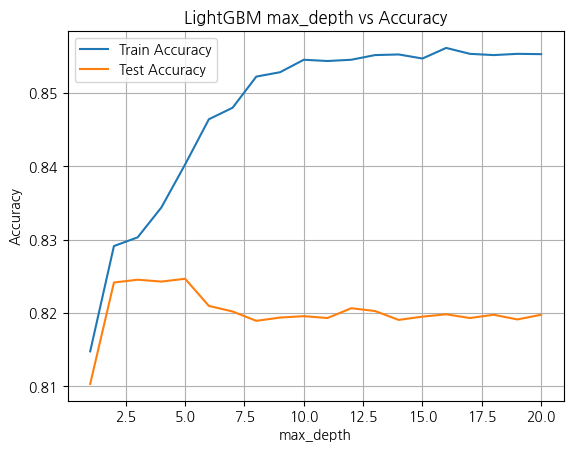

In [122]:
import matplotlib.pyplot as plt

plt.plot(depth_list, train_acc_list, label='Train Accuracy')
plt.plot(depth_list, test_acc_list, label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('LightGBM max_depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 데이터를 증폭/축소해서 class 불균형 해소
* imbalanced-learn, smote/cluster-centroids
* 머신러닝 알고리즘을 통해 비슷한 데이터를 생성/축소
* **주의사항** : 반드시 train 데이터에만 적용
* https://imbalanced-learn.org/stable/install.html
    * over-sampling, under-sampling

In [124]:
from imblearn.over_sampling import SMOTENC

In [135]:
categorical = X_train.select_dtypes(exclude='number').columns.tolist()

In [136]:
smt = SMOTENC(categorical_features=categorical, k_neighbors=5, random_state=10)
smt_X, smt_y = smt.fit_resample(X_train, y_train)

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [139]:
dtc2 = DecisionTreeClassifier(max_depth=9, random_state=10)
dtc2.fit(smt_X, smt_y)
dtc_pred2 = dtc2.predict(X_test)
print(classification_report(y_test, dtc_pred2))

              precision    recall  f1-score   support

       False       0.94      0.78      0.85     11706
        True       0.57      0.85      0.68      3990

    accuracy                           0.80     15696
   macro avg       0.76      0.82      0.77     15696
weighted avg       0.85      0.80      0.81     15696



In [140]:
rfc2 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=10)
rfc2.fit(smt_X, smt_y)
rfc_pred2 = rfc2.predict(X_test)
print(classification_report(y_test, rfc_pred2))

              precision    recall  f1-score   support

       False       0.94      0.78      0.85     11706
        True       0.57      0.85      0.68      3990

    accuracy                           0.80     15696
   macro avg       0.75      0.82      0.77     15696
weighted avg       0.84      0.80      0.81     15696



# k-fold
* k-fold 교차검증 : 훈련에 사용할 데이터를 여러 개로 나누어서 편향을 줄이고 모델을 균형 잡히게 하는 방법

# 하이퍼파라미터 튜닝
* 머신러닝 알고리즘에 있는 여러 파라미터를 조정해서 최고의 성능을 내는 모델을 만드는 것
* max_depth, n_estimators, learning_rate
### gridsearch, randomsearch
* gridsearch : 지정해놓은 모든 경우의 수의 하이퍼파라미터를 탐색
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* randomsearch : 지정해놓은 범위 내에서 랜덤하게 탐색

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [143]:
model = DecisionTreeClassifier()

In [146]:
params = dict(criterion=["gini", "entropy", "log_loss"], 
              max_depth=[1,5,10,15],
              random_state=[7,10,777],
              class_weight=[None,'balanced'])

In [147]:
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)
print('best_params : ', grid_cv.best_params_)
print('best_score : ', grid_cv.best_score_)

best_params :  {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'random_state': 7}
best_score :  0.8496007475365274


In [148]:
model2 = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=7)
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.87      0.94      0.90     11706
        True       0.76      0.57      0.65      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



In [149]:
params = dict(criterion=["gini", "entropy", "log_loss"], 
              max_depth=[8,9,10,11,12],
              random_state=[5,6,7,8,9,10,777],
              class_weight=[None,'balanced'])

In [150]:
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)
print('best_params : ', grid_cv.best_params_)
print('best_score : ', grid_cv.best_score_)

best_params :  {'class_weight': None, 'criterion': 'entropy', 'max_depth': 11, 'random_state': 10}
best_score :  0.8499405368671423


In [151]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=11, random_state=10)
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.87      0.94      0.90     11706
        True       0.76      0.58      0.66      3990

    accuracy                           0.85     15696
   macro avg       0.82      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



### GridSearch에서 score 기준 변경하기
* scoring=[accuracy,precision, recall, f1, roc_auc]

In [152]:
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1, scoring='recall')
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)
print('best_params : ', grid_cv.best_params_)
print('best_score : ', grid_cv.best_score_)

best_params :  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'random_state': 6}
best_score :  0.8624895572263993


In [154]:
model4 = DecisionTreeClassifier(class_weight='balanced', criterion='gini',max_depth=10, random_state=6)
model4.fit(X_train, y_train)
pred = model4.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.95      0.76      0.84     11706
        True       0.55      0.87      0.68      3990

    accuracy                           0.79     15696
   macro avg       0.75      0.82      0.76     15696
weighted avg       0.85      0.79      0.80     15696



### 클래스 0에 대한 score를 계산하고 싶을 때

In [155]:
from sklearn.metrics import make_scorer, recall_score

In [156]:
recall_0_scorer = make_scorer(recall_score, pos_label=0)

In [157]:
grid_cv = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1, scoring=recall_0_scorer)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)
print('best_params : ', grid_cv.best_params_)
print('best_score : ', grid_cv.best_score_)

best_params :  {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'random_state': 8}
best_score :  0.9423657383677887


In [158]:
model5 = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=8)
model5.fit(X_train, y_train)
pred = model5.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.87      0.94      0.90     11706
        True       0.76      0.57      0.65      3990

    accuracy                           0.85     15696
   macro avg       0.81      0.76      0.78     15696
weighted avg       0.84      0.85      0.84     15696



### RandomSearch
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
* 지정한 파라미터 값에서 랜덤성을 더해서 최적값을 찾아냄

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
model = DecisionTreeClassifier(random_state=10)

In [160]:
params = dict(criterion=["gini", "entropy", "log_loss"], 
              max_depth=[1,5,10,15],
              random_state=[7,10,777],
              class_weight=[None,'balanced'])

In [163]:
rand_cv = RandomizedSearchCV(model, param_distributions=params, scoring='f1', cv=3, n_jobs=-1, random_state=10)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_test)
print('best_params : ', rand_cv.best_params_)
print('best_score : ', rand_cv.best_score_)

best_params :  {'random_state': 7, 'max_depth': 15, 'criterion': 'log_loss', 'class_weight': 'balanced'}
best_score :  0.6839224310357866


In [164]:
model6 = DecisionTreeClassifier(criterion='log_loss',max_depth=15, random_state=7, class_weight='balanced')
model6.fit(X_train, y_train)
pred = model6.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.94      0.78      0.85     11706
        True       0.56      0.85      0.68      3990

    accuracy                           0.79     15696
   macro avg       0.75      0.81      0.76     15696
weighted avg       0.84      0.79      0.81     15696



### XGBoost를 RandomSearch로 하이퍼파라미터 튜닝하기

In [167]:
xgb = XGBRFClassifier(n_jobs=-1, random_state=10)

In [170]:
xgb_params = dict(n_estimators=[100,300,500,700,1000],
                  max_depth=[1,5,10,15,20],
                  learning_rate=[0.1, 0.3, 0.5, 0.7, 1],
                  booster=['gbtree','dart'],
                  scale_pos_weight=[0,3]
                  )

In [171]:
rand_cv = RandomizedSearchCV(xgb, param_distributions=xgb_params, cv=3, scoring='roc_auc', random_state=10)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_test)
print('best_params : ', rand_cv.best_params_)
print('best_score : ', rand_cv.best_score_)

best_params :  {'scale_pos_weight': 3, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.5, 'booster': 'gbtree'}
best_score :  0.9067180023639599


In [173]:
from sklearn.metrics import roc_auc_score

In [174]:
xgb2 = XGBRFClassifier(scale_pos_weight=3, n_estimators=100, max_depth=15, learning_rate=0.5, booster='gbtree')
xgb2.fit(X_train, y_train)
pred = xgb2.predict(X_test)
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

       False       0.94      0.79      0.86     11706
        True       0.58      0.85      0.69      3990

    accuracy                           0.81     15696
   macro avg       0.76      0.82      0.78     15696
weighted avg       0.85      0.81      0.82     15696

0.8217882610164572


# 데이터 분석 과정 재정리
1) 데이터 선택 및 로딩
2) 결측값, 이상값 탐지
3) EDA(탐색적 데이터 분석)
4) 변수 데이터타입, 서열변수, 카테고리변수 처리
5) 변수 선택, 파생변수 생성
6) 홀드아웃(훈련 데이터, 테스트 데이터로 분리)
7) 분석에 맞는 알고리즘 불러와서 모델 생성
8) 분석 목적에 맞는 지표를 이용해서 모델 성능 검증
9) 하이퍼파라미터 튜닝(클래스 불균형 해소 - 모델에서 소수 클래스 가중치 조절, 데이터 중폭 및 축소)
10) 최종 모델 선택